In [39]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species_name'] = data['species'].apply(lambda x: iris.target_names[x])

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
# Show dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [35]:
# discribtive analysis
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [36]:
# class distribution

data['species_name'].value_counts()

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
# to check missing value
data.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

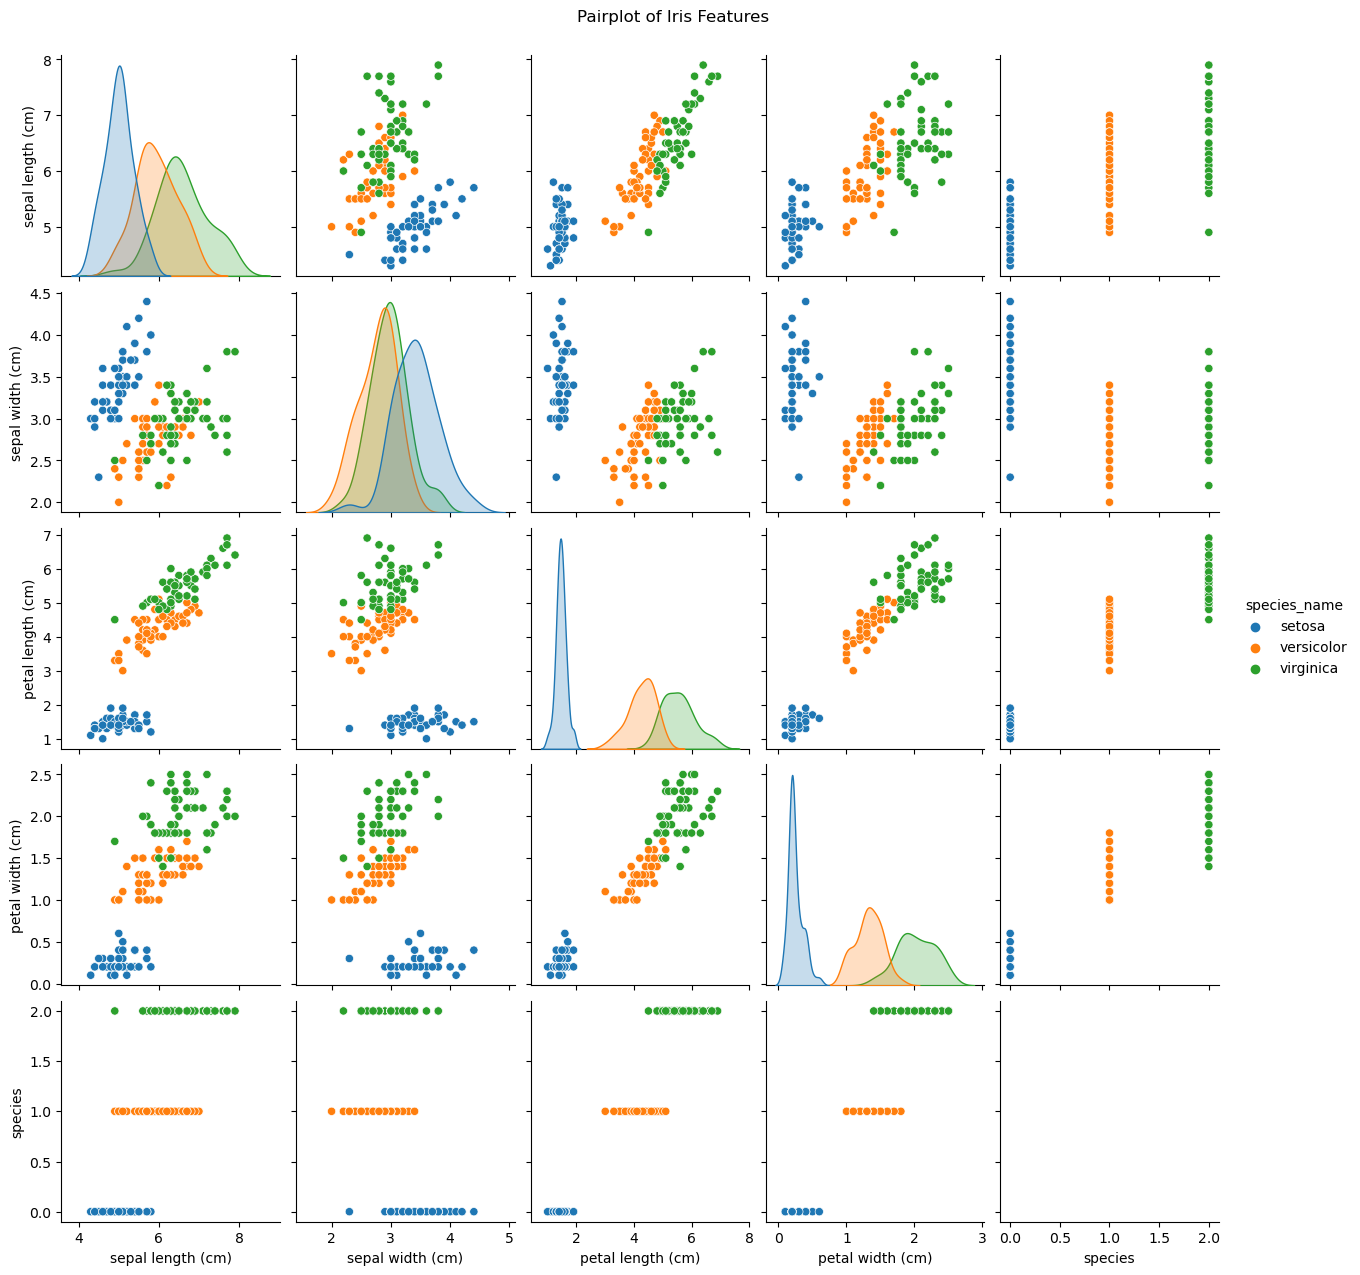

In [37]:
# checking for relationships
sns.pairplot(data, hue='species_name', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

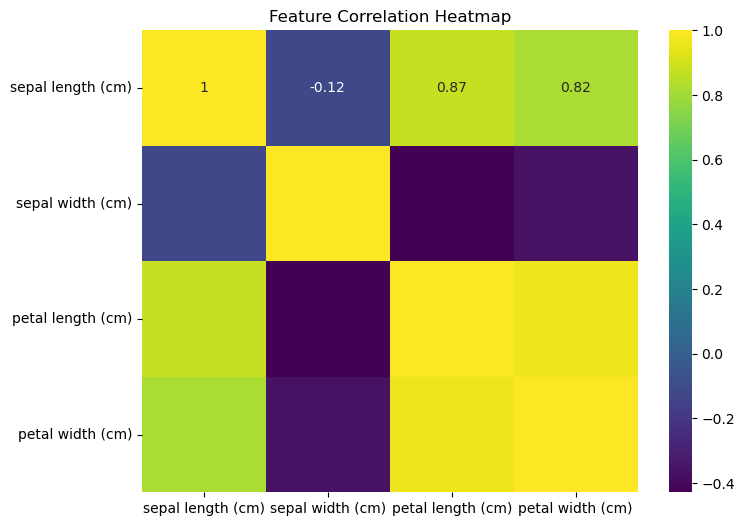

In [38]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.iloc[:, :-2].corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Prepare features (X) and labels (y)
X = data[iris.feature_names]
y = data['species']

In [26]:
# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [27]:
# Scale the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Train model using logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

In [43]:
# evaluation

test_accuracy = accuracy_score(y_true=y_test, y_pred=test_preds)
print(f'test accuracy: {test_accuracy}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1_Score: {f1}')
print('classification_report')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

test accuracy: 0.9666666666666667
F1_Score: 0.9667698658410733
classification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'test confusion matrix')

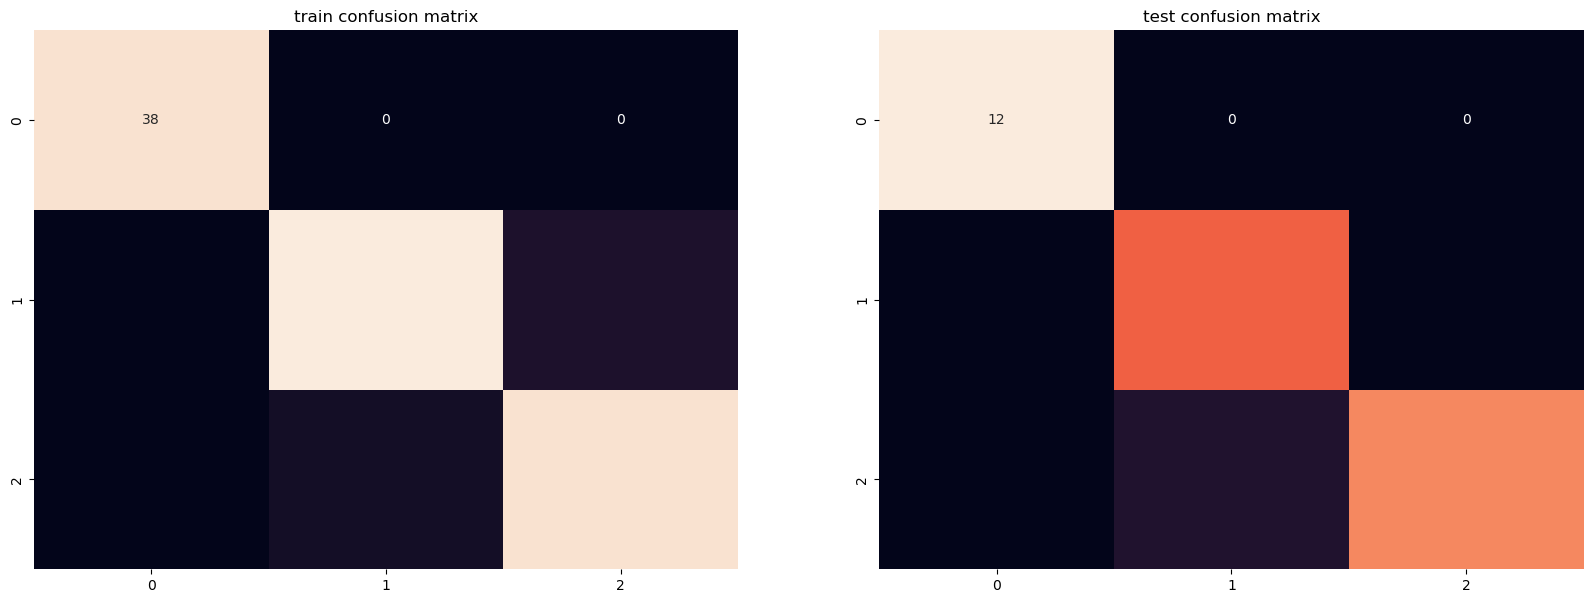

In [44]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)

fig, axes = plt.subplots(1,2, figsize = (20, 7))
sns.heatmap(data=train_confusion, ax = axes[0], cbar=False, annot= True, fmt='d')
sns.heatmap(data=test_confusion, ax = axes[1], cbar=False, annot= True, fmt='d')
axes[0].set_title('train confusion matrix')
axes[1].set_title('test confusion matrix')